In [2]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio, display

In [3]:
l= os.listdir("/kaggle/input/ravdess-emotional-speech-audio")
print(len(l))
print(l)

25
['Actor_02', 'Actor_17', 'Actor_05', 'Actor_16', 'Actor_21', 'Actor_01', 'Actor_11', 'Actor_20', 'Actor_08', 'Actor_15', 'Actor_06', 'Actor_12', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_04', 'Actor_19', 'Actor_10', 'Actor_09', 'audio_speech_actors_01-24', 'Actor_14', 'Actor_03', 'Actor_13', 'Actor_18', 'Actor_07']


**Sample rate**
-
**It is the number of times amplitude of the signal is measured in one second to create the digital signal**

**The Amplitide is normalized between -1 and 1**


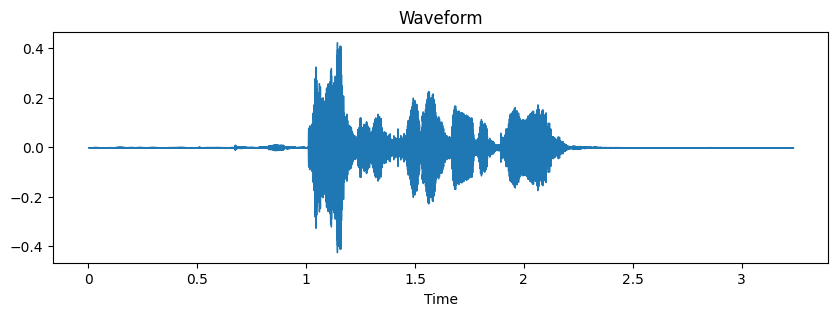

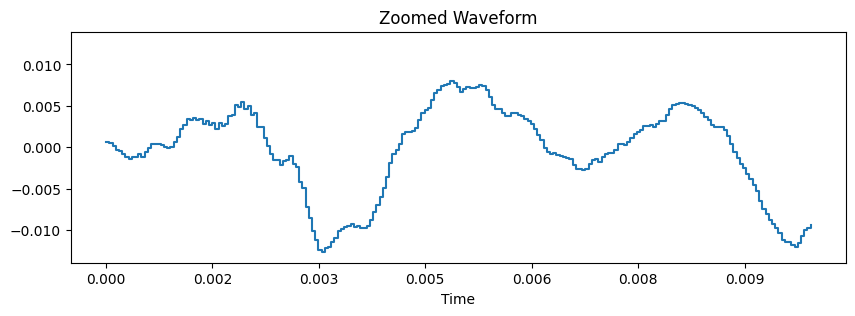

In [4]:
l= os.listdir("/kaggle/input/ravdess-emotional-speech-audio")
data_dir=f"/kaggle/input/ravdess-emotional-speech-audio/{l[2]}"
sub_l= os.listdir(data_dir)

# load the .wav file
y, sr = librosa.load(os.path.join(data_dir,sub_l[29]))  # y: audio time series, sr: sample rate

# play the .wav file
display(Audio(data=y, rate=sr))

# plot the .wav file
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.show()

display(Audio(data=y[int(1.500*sr):int(1.510*sr)], rate=sr))

# crop and zoom
y, sr = librosa.load(os.path.join(data_dir,sub_l[0]))  # y: audio time series, sr: sample rate
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y[int(1.500*sr):int(1.510*sr)], sr=sr)
plt.title("Zoomed Waveform")
plt.show()

In [5]:
print(y[int(sr*1.5):int(sr*2)])
print(y.shape)
print(y.shape[0]/sr) # This is the time length of the audio

[0.00059635 0.00048464 0.00013326 ... 0.0074623  0.01256808 0.01497861]
(81667,)
3.703718820861678


In [6]:
segment = y[int(1.500*sr):int(1.501*sr)]  

print(sr)
print(type(segment))
print(segment)
print(segment.shape)

22050
<class 'numpy.ndarray'>
[ 5.96347556e-04  4.84644290e-04  1.33260735e-04 -2.98926840e-04
 -5.07798977e-04 -8.49900243e-04 -1.15367642e-03 -1.37133489e-03
 -1.18325069e-03 -1.12484652e-03 -8.74773308e-04 -1.16938702e-03
 -5.71493874e-04 -1.46548031e-04  4.42150224e-04  3.97791126e-04
  3.47550726e-04  2.95060105e-04  6.75019255e-05 -1.16227915e-04
  1.02599151e-05  6.13261247e-04]
(22,)


## Pitch Shifting

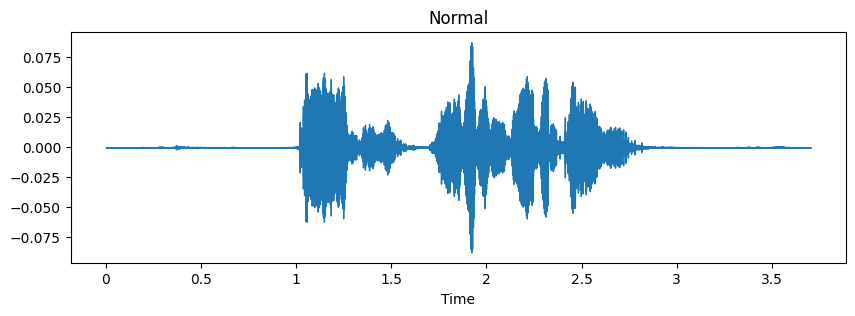

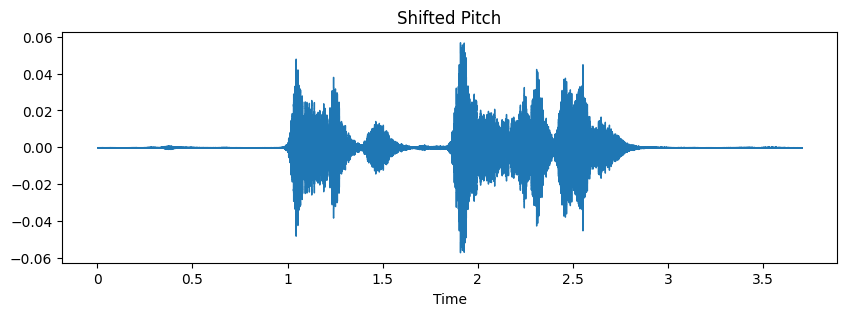

In [7]:
display(Audio(data=y, rate=sr))

plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Normal")
plt.show()

# here the pitch of the signal at all sampling points are increased ny 50 semitones
pitch_shifted= librosa.effects.pitch_shift(y, sr=sr, n_steps=50)
display(Audio(data=pitch_shifted, rate=sr))

plt.figure(figsize=(10, 3))
librosa.display.waveshow(pitch_shifted, sr=sr)
plt.title("Shifted Pitch")
plt.show()

## Time Stretching

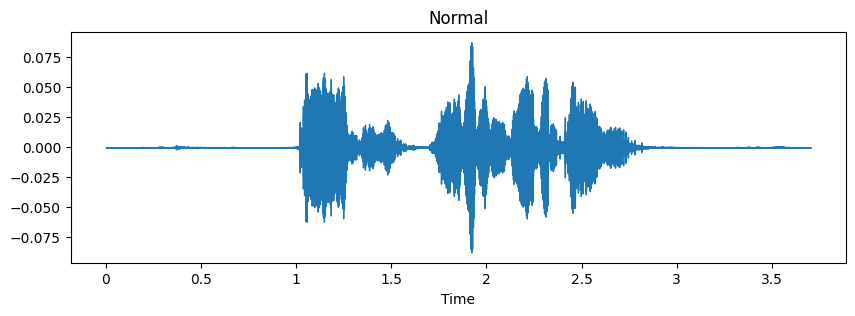

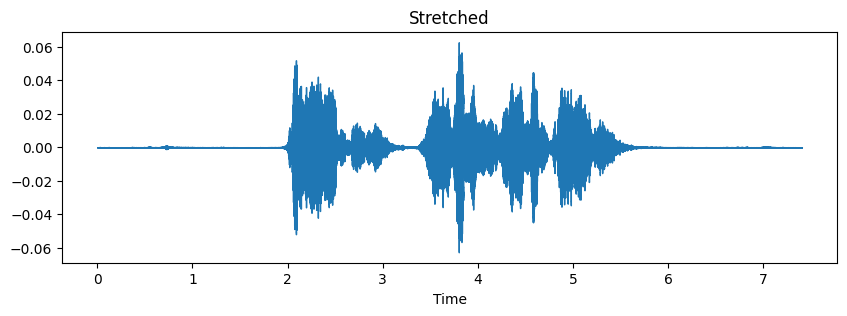

In [8]:
display(Audio(data=y, rate=sr))

plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Normal")
plt.show()

# the time length is divided by a factor of 0.5
time_stretched= librosa.effects.time_stretch(y, rate=0.5)
display(Audio(data=time_stretched, rate=sr))

plt.figure(figsize=(10, 3))
librosa.display.waveshow(time_stretched, sr=sr)
plt.title("Stretched")
plt.show()

## Trimming



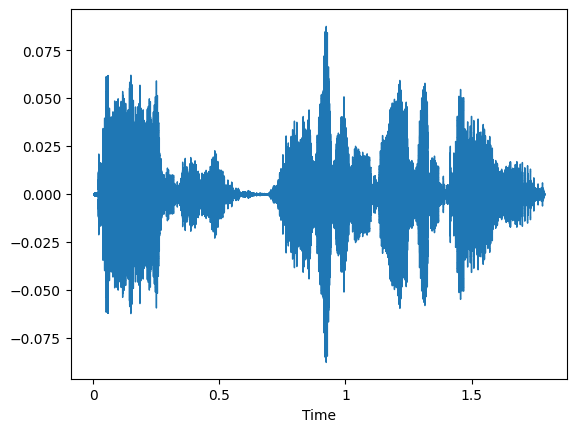

In [9]:
y_trimmed, _= librosa.effects.trim(y, top_db=20)

display(Audio(data=y_trimmed, rate=sr))

librosa.display.waveshow(y_trimmed, sr=sr)

## Spectrum and Cepstrum

Mathematically, a spectrum is the Fourier transform of a signal. A Fourier transform converts a time-domain signal to the frequency domain. In other words, a spectrum is the frequency domain representation of the input audio's time-domain signal.

A cepstrum is formed by taking the log magnitude of the spectrum followed by an inverse Fourier transform. This results in a signal that's neither in the frequency domain (because we took an inverse Fourier transform) nor in the time domain (because we took the log magnitude prior to the inverse Fourier transform). The domain of the resulting signal is called the quefrency.

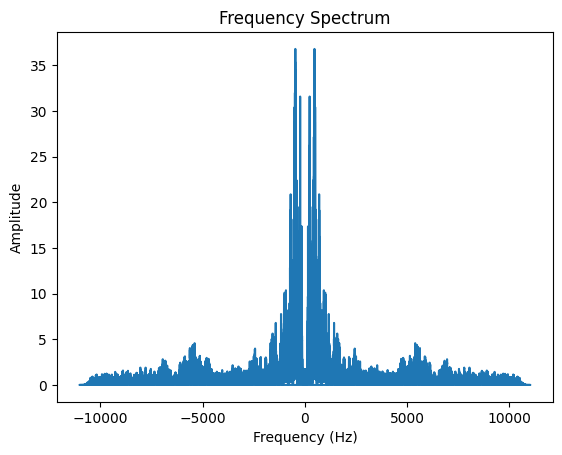

In [10]:
Y= np.fft.fft(y)
freqs= np.fft.fftfreq(len(y), 1/sr)

# plt.plot(freqs[:len(freqs)//2], np.abs(Y)[:len(Y)//2])
plt.plot(freqs, np.abs(Y))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum')
plt.show()

In [11]:
print(Y)
print(type(Y))
print(type(Y[0]))
print(Y.shape)

print("\n")

print(Y[0])
print(Y[1])

print(Y[0]-Y[1])

[-0.47195002+0.j         -0.0665851 +0.3329258j   0.01686706-0.29633796j
 ... -0.33670568+0.11715335j  0.01686706+0.29633796j
 -0.0665851 -0.3329258j ]
<class 'numpy.ndarray'>
<class 'numpy.complex64'>
(81667,)


(-0.47195002+0j)
(-0.0665851+0.3329258j)
(-0.40536493-0.3329258j)


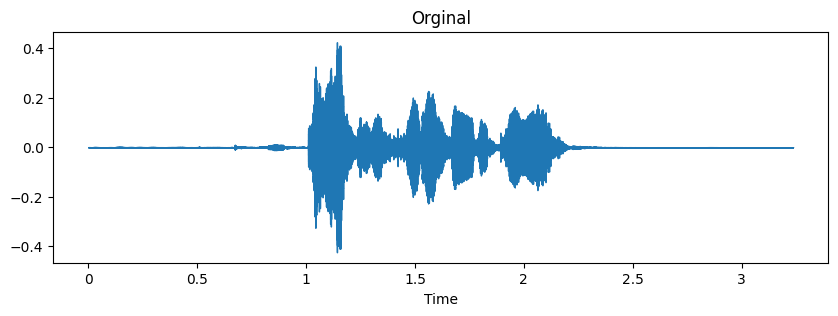

[-0.47195002+0.j         -0.0665851 +0.3329258j   0.01686706-0.29633796j
 ... -0.33670568+0.11715335j  0.01686706+0.29633796j
 -0.0665851 -0.3329258j ]
[-0.47145003+0.j         -0.0660751 +0.3329258j   0.01738706-0.29633796j
 ...  0.48043433+0.11715335j  0.83401704+0.29633796j
  0.7505749 -0.3329258j ]


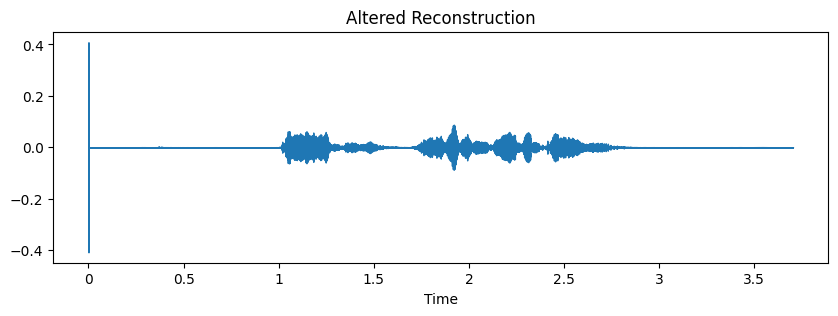

In [12]:
l= os.listdir("/kaggle/input/ravdess-emotional-speech-audio")
data_dir=f"/kaggle/input/ravdess-emotional-speech-audio/{l[2]}"
sub_l= os.listdir(data_dir)

# load the .wav file
  # y: audio time series, sr: sample rate
file_path= os.path.join(data_dir,sub_l[29])

def check(file_path):

   # Orginal
   y, sr = librosa.load(file_path)

   display(Audio(data=y, rate=sr))

   plt.figure(figsize=(10, 3))
   librosa.display.waveshow(y, sr=sr)
   plt.title("Orginal")
   plt.show()

   # Alterations
   Y_= Y.copy()

   # Alteration of FT
   d= 0.0005
   for i in range(Y_.shape[0]):
       Y_[i]= Y_[i]+ d
       d+= 0.00001

   print(Y)
   print(Y_)
    
   y_recont_2= np.fft.ifft(Y_) 
   y_recont_2= np.real(y_recont_2)

   display(Audio(data=y_recont_2, rate=sr))

   plt.figure(figsize=(10, 3))
   librosa.display.waveshow(y_recont_2, sr=sr)
   plt.title("Altered Reconstruction")
   plt.show()


check(file_path)


In [13]:
print(len(Y))

rand_phase= np.zeros(len(Y), dtype=complex)

sum_so_far=1
for i in range(len(Y)):
    sum_so_far+= i
    rand_phase[i]= np.exp(1j * 2 * np.pi * (1/(i+1)))

print(rand_phase)


81667
[ 1. -2.44929360e-16j -1. +1.22464680e-16j -0.5+8.66025404e-01j ...
  1. +7.69385330e-05j  1. +7.69375909e-05j  1. +7.69366488e-05j]


## Scrambeller

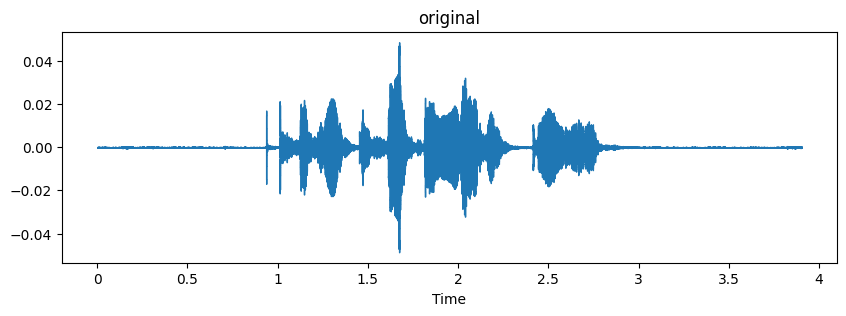

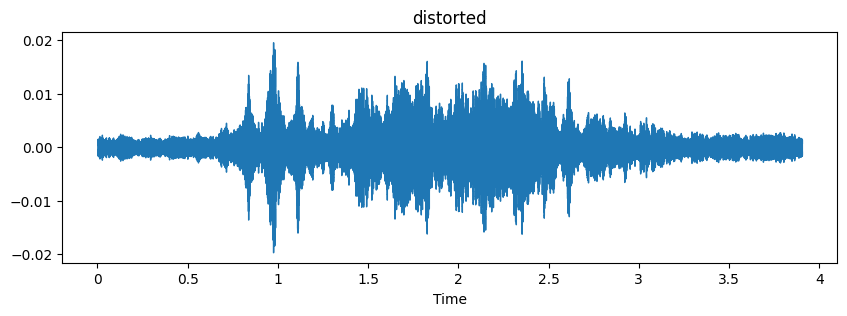

True


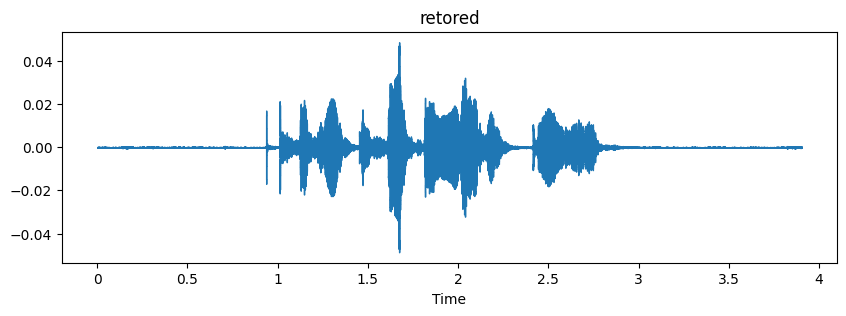

In [14]:
def distort_signal(y, sr, seed=42):
    np.random.seed(seed)
    Y= np.fft.fft(y)
    magnitude= np.abs(Y)

    values = np.linspace(-len(Y)/2, len(Y)/2, len(Y))

    # modified sigmoid
    def sigmoid(x):
        return x / (1 + np.exp(-x*x))

    sigmoid_vals = sigmoid(values) * sigmoid(values)
        
    rand_phase = np.exp(1j * 2 * np.pi * sigmoid_vals)

    # rand_phase = np.exp(1j * 2 * np.pi * np.random.rand(len(Y)))
    distortion_key = 1 / rand_phase 

    Y_distorted = Y * rand_phase
    y_distorted = np.fft.ifft(Y_distorted)  # Keep complex part

    return y_distorted, distortion_key

def restore_signal(y_distorted, distortion_key):
    Y_distorted = np.fft.fft(y_distorted)  # Still complex
    Y_original = Y_distorted * distortion_key
    y_restored = np.fft.ifft(Y_original)
    return y_restored

# load y
l= os.listdir("/kaggle/input/ravdess-emotional-speech-audio")
data_dir=f"/kaggle/input/ravdess-emotional-speech-audio/{l[8]}"
sub_l= os.listdir(data_dir)

file_path= os.path.join(data_dir,sub_l[9])
y, sr = librosa.load(file_path)

display(Audio(data=y, rate=sr))

plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("original")
plt.show()

# distort the signal
y_, key= distort_signal(y, sr, seed=42)

display(Audio(data=np.real(y_), rate=sr))

plt.figure(figsize=(10, 3))
librosa.display.waveshow(np.real(y_), sr=sr)
plt.title("distorted")
plt.show()

# restrore the signal
y__= restore_signal(y_, key)
print(np.allclose(y, y__, atol=1e-6))  # Should be True

display(Audio(data=np.real(y__), rate=sr))

plt.figure(figsize=(10, 3))
librosa.display.waveshow(np.real(y__), sr=sr)
plt.title("retored")
plt.show()

## Spectrogram

Representation of Frequency vs Time, it has color gradients to represent amplitude

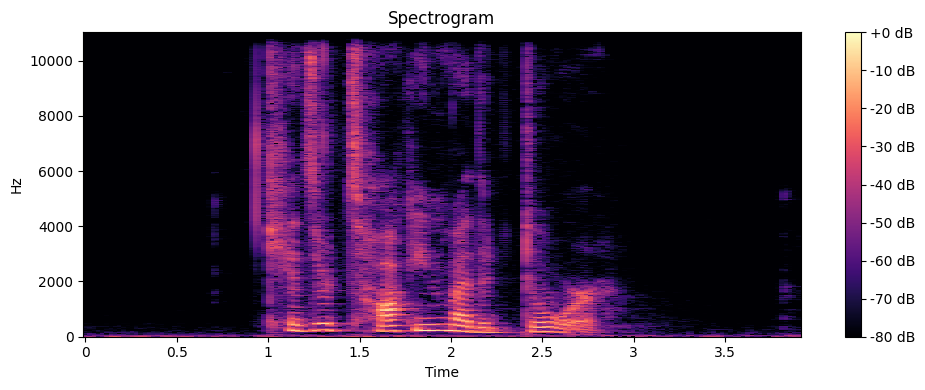

In [15]:
import librosa.display

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

## MFCC

1. Pre-emphasis (optional in librosa)
Boosts high frequencies to balance the spectrum.

2. Framing
Audio is split into short, overlapping frames (e.g., 25 ms each, 10 ms overlap). Overlapping prevents infomation loss(happens while applying window function as they remove the edges) and smoother transition over frames.

3. Windowing
Each frame is multiplied by a window function (like Hamming) to reduce edge effects.

4. FFT (Fast Fourier Transform)
Converts each frame from time domain to frequency domain, giving the spectrum.

5. Mel Filter Bank
The spectrum is passed through a set of triangular filters spaced according to the Mel scale (which mimics human hearing). This results in Mel-scaled spectral energies.

6. Logarithm
The log of each Mel filter bank energy is taken (because human loudness perception is logarithmic).

7. Discrete Cosine Transform (DCT)
DCT is applied to the log-Mel energies, resulting in the MFCCs.

Only the first n_mfcc coefficients are kept (usually 13), as they contain the most relevant information.

In an MFCC (Mel-Frequency Cepstral Coefficient) plot:

X-axis: Time (or frame number). This axis shows the progression of the audio signal over time, typically in seconds or as the index of each short analysis frame.

Y-axis: MFCC coefficient index. This represents the index (from 0 to 12, if you use 13 coefficients) of the MFCCs for each frame. These coefficients do not have physical units—they are abstract features capturing aspects of the spectral envelope of the sound.

The color at each point in the plot represents the magnitude (value) of a particular MFCC coefficient at a particular time frame.

MFCCs shape: (13, 169)
[[-8.3562750e+02 -8.3330029e+02 -8.3444226e+02 ... -7.7876935e+02
  -7.9929321e+02 -8.1539154e+02]
 [ 2.2524317e+01  2.5786682e+01  2.4295948e+01 ...  5.7468262e+01
   4.7471687e+01  3.7038078e+01]
 [ 2.1172237e+01  2.4349327e+01  2.3224180e+01 ...  1.0329559e+01
   1.4536017e+01  1.7960670e+01]
 ...
 [ 5.6845589e+00  6.8871889e+00  8.6984997e+00 ...  1.8617401e+01
   1.3629334e+01  1.0888172e+01]
 [ 5.3752046e+00  6.3836865e+00  7.4803581e+00 ... -2.1084554e+00
  -4.9532646e-01  3.0795426e+00]
 [ 5.3087873e+00  6.1994095e+00  6.5536580e+00 ... -5.0885658e+00
  -8.5156798e-02  5.1035843e+00]]


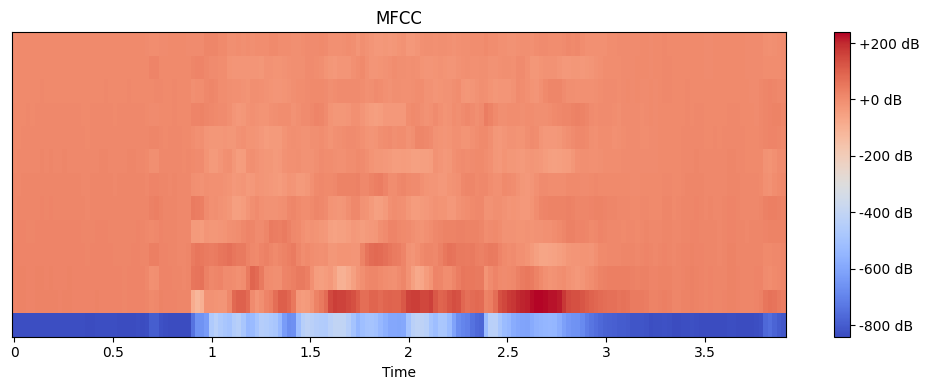

In [16]:
# Extract MFCCs (e.g., 13 coefficients per frame)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Print MFCC shape (n_mfcc, n_frames)
print("MFCCs shape:", mfccs.shape)
print(mfccs)

# Plot the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.tight_layout()
plt.show()

## Chromagram

Chroma (in audio and music analysis) refers to a feature that captures the intensity or energy of each of the 12 distinct pitch classes (C, C#, D, D#, E, F, F#, G, G#, A, A#, B) present in an audio signal, regardless of the octave in which they occur.
Chroma features are octave-invariant—they treat C3, C4, and C5 as the same chroma (C), making them especially useful for harmonic and melodic analysis in music.

1. The signal is split into short frames, and the frequency content of each frame is computed.
2. For each frame, the energy from all frequencies corresponding to the same pitch class (e.g., all C notes, regardless of octave) is summed together.
3. This creates a 12-element vector for each frame, one for each pitch class (C, C#, D, D#, E, F, F#, G, G#, A, A#, B).
4. The chroma vectors are often normalized (so the sum of all 12 pitch classes per frame is 1), making them robust to loudness changes.

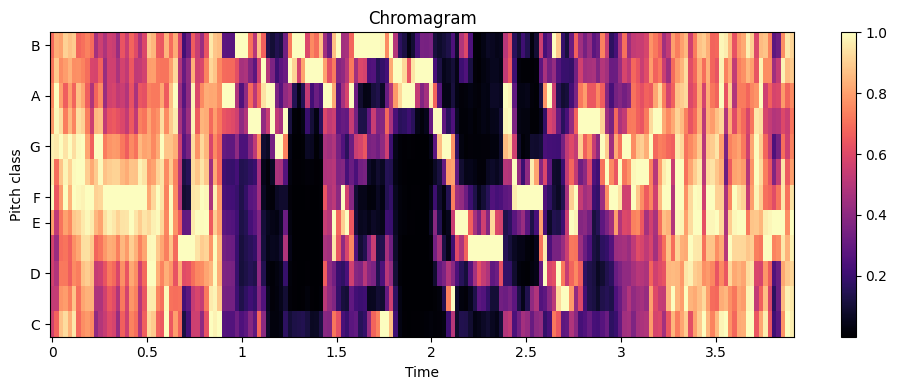

In [17]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# Plot the chromagram
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', sr=sr)
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()


In [18]:
print(chroma)
print(chroma.shape)

[[0.565085   0.6710661  0.8747757  ... 0.7745957  1.         0.96859133]
 [0.53266627 0.5337757  0.77639073 ... 0.85358346 0.97433    0.9536897 ]
 [0.56479806 0.4866893  0.71550614 ... 0.8143796  0.8828385  0.9102688 ]
 ...
 [0.7519657  1.         0.79805744 ... 0.7882281  0.6732608  0.7577156 ]
 [0.7126237  0.89007246 0.7600831  ... 0.9765506  0.86158407 0.88684464]
 [0.68414724 0.82481015 0.80513537 ... 0.763415   0.95198596 0.91225404]]
(12, 169)


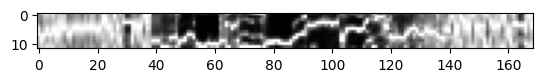

In [19]:
import cv2
data= chroma*255

plt.imshow(data, cmap='gray')
plt.show()